In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

Num GPUs Available:  1


In [3]:
def add_square(img, center, width):
  start_point = (center[0]-width, center[1]-width)
  end_point   = (center[0]+width, center[1]+width)
  cv2.rectangle(img, start_point, end_point, random_color(),cv2.FILLED)

In [4]:
def create_data_sample(num_shapes, height, width):
  img = np.zeros((height, width, 3))
  label = np.zeros((height, width, 1))
  for _ in range(num_shapes):
    x = int(np.random.rand()*width)
    y = int(np.random.rand()*height)
    if np.random.rand() > 0.9:
      cv2.circle(img, (x,y), int(np.ceil(width*0.05)), random_color(), cv2.FILLED)
      cv2.circle(label, (x,y), int(np.ceil(width*0.02)), (1,1,1), cv2.FILLED)
    # else: 
    #   add_square(img, (x,y), int(np.ceil(width*0.05*0.7)))
  return img, label


In [5]:
def test_batch(num_shapes, height, width):
  img, label = create_data_sample(num_shapes, height, width)
  return np.expand_dims(img,0), np.expand_dims(label,0)

In [6]:
def grayscale_image(img):
  return np.expand_dims((img[:,:,0] + img[:,:,1] + img[:,:,2])/3,2)

In [7]:
# (128,128,1) --> (128,128,3)
def to_three_channels(img):
  return np.squeeze(np.stack((img,img,img), 2))

In [8]:
def random_color():
  return np.random.rand(3)

In [9]:
def show_sample(img, label):
  figure, axis = plt.subplots(1,2)
  axis[0].imshow(img)
  axis[1].imshow(to_three_channels(label))

In [10]:
def show_batch(img, label):
  show_sample(img[0,:,:,:],label[0,:,:,0])

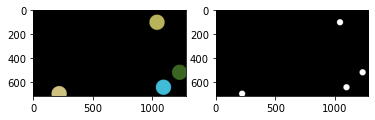

In [11]:
img_shape = (720,1280,3)
img, label = create_data_sample(10, img_shape[0], img_shape[1])
show_sample(img, label)

(1, 720, 1280, 3) (1, 720, 1280, 1)


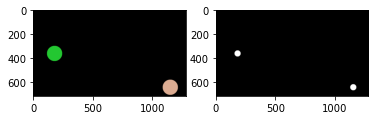

In [12]:
img, label = test_batch(10, img_shape[0], img_shape[1])
print(img.shape, label.shape)
show_batch(img, label)

In [13]:
#l2 = keras.regularizers.l2(1e-5)
l2 = None
inputs = keras.Input(shape=img_shape)
conv1 = keras.layers.Conv2D(32,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(inputs)
conv1 = keras.layers.BatchNormalization(momentum=0.99)(conv1)
conv2 = keras.layers.Conv2D(64,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(conv1)
conv2 = keras.layers.BatchNormalization(momentum=0.99)(conv2)
conv3 = keras.layers.Conv2D(128,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(conv2)
conv3 = keras.layers.BatchNormalization(momentum=0.99)(conv3)
conv4 = keras.layers.Conv2D(128,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(conv3)
conv4 = keras.layers.BatchNormalization(momentum=0.99)(conv4)
outputs = keras.layers.Conv2D(1,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(conv4)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 720, 1280, 3)]    0         
_________________________________________________________________
conv2d (Conv2D)              (None, 720, 1280, 32)     2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 720, 1280, 32)     128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 720, 1280, 64)     51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 720, 1280, 64)     256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 720, 1280, 128)    204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 720, 1280, 128)    512   

In [14]:
def loss_function(y_true, y_pred):
  squared_diff = tf.square(y_true - y_pred)
  return tf.reduce_mean(squared_diff)


In [15]:
# x_list = []
# y_list = []
# for i in range(1000):
#   x,y  = create_data_sample(10, img_shape[0], img_shape[1])
#   x_list.append(x)
#   y_list.append(y)
# x_list = np.array(x_list)
# y_list = np.array(y_list)

x_list = []
y_list = []
for i in range(100):
  print(i)
  name=str(i)+".jpeg"
  x=plt.imread('train/images/'+name)
  y=plt.imread('train/labels/'+name)
  x_list.append(x)
  y_list.append(y)
x_list = np.array(x_list)
y_list = np.array(y_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [16]:
y_list=y_list[:,:,:,0]

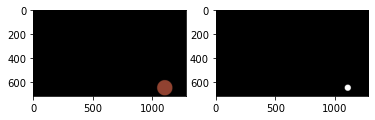

In [17]:
i = 3
show_sample(x_list[i], y_list[i])

In [18]:
y_list=tf.cast(y_list, tf.float32)

In [19]:
opt = keras.optimizers.Adam(learning_rate=1e-2)
model.compile(optimizer=opt,loss=loss_function)

In [ ]:

model.fit(x_list,y_list,batch_size=1,epochs=10)

Epoch 1/10


In [21]:
model.fit(x_list,y_list,batch_size=1,epochs=1000)

Epoch 1/100
100/100 [==============================] - 28s 284ms/step - loss: 118.6401
Epoch 2/100
100/100 [==============================] - 28s 285ms/step - loss: 118.2453
Epoch 3/100
100/100 [==============================] - 29s 287ms/step - loss: 117.9701
Epoch 4/100
100/100 [==============================] - 29s 287ms/step - loss: 117.7581
Epoch 5/100
100/100 [==============================] - 29s 287ms/step - loss: 118.6629
Epoch 6/100
100/100 [==============================] - 29s 288ms/step - loss: 117.9048
Epoch 7/100
100/100 [==============================] - 29s 288ms/step - loss: 117.9830
Epoch 8/100
100/100 [==============================] - 29s 288ms/step - loss: 118.1566
Epoch 9/100
100/100 [==============================] - 29s 291ms/step - loss: 117.4037
Epoch 10/100
100/100 [==============================] - 29s 290ms/step - loss: 116.1040
Epoch 11/100
100/100 [==============================] - 29s 295ms/step - loss: 116.1782
Epoch 12/100
100/100 [===================

KeyboardInterrupt: 

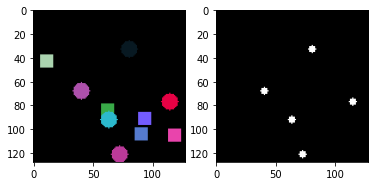

In [ ]:
img, label = test_batch(10, img_shape[0], img_shape[1])
show_batch(img,label)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.5814799


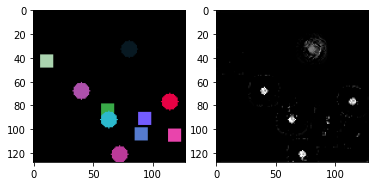

In [ ]:
y_pred = model.predict(img)
print(y_pred.max())
show_batch(img, y_pred)

In [3]:
a=plt.imread('train/images/1.jpeg')

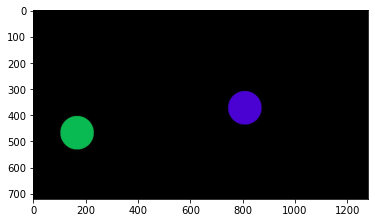

In [4]:
plt.imshow(a)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)